In [1]:
import pandas as pd

invoices_df = pd.read_csv("fct_invoice.csv")
customers_df = pd.read_json("dim_customer.json")

In [2]:
unique_customers = invoices_df['customer_id'].nunique()
print("Number of unique customers: ", unique_customers)

Number of unique customers:  5191


In [3]:
unique_categories = invoices_df['category'].unique()
num_unique_categories = len(unique_categories)

print("Different categories of products: ", unique_categories)
print("Number of unique categories: ", num_unique_categories)

Different categories of products:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories:  8


In [4]:
popular_payment_method = invoices_df['payment_method'].value_counts().idxmax()
most_used = invoices_df['payment_method'].value_counts().max()

print("Most popular payment method:", popular_payment_method)
print("Number of times used:", most_used)

Most popular payment method: Cash
Number of times used: 44447


In [5]:
invoices_df["sales"] = invoices_df["quantity"] * invoices_df["price"]
popular_categories = invoices_df.groupby("category")["sales"].sum().nlargest(3)
print("Three most popular categories by total sales:")
for category, total_sales in popular_categories.items():
    print(category, ": ", total_sales)

Three most popular categories by total sales:
Clothing :  113996791.03999999
Shoes :  66553451.47
Technology :  57862350.0


In [6]:
merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
total_customers_over_45 = merged_df[merged_df['age'] > 45].sum()
print("Total sales attributed to customers over the age of 45:", total_customers_over_45["sales"].sum())

Total sales attributed to customers over the age of 45: 82039768.15


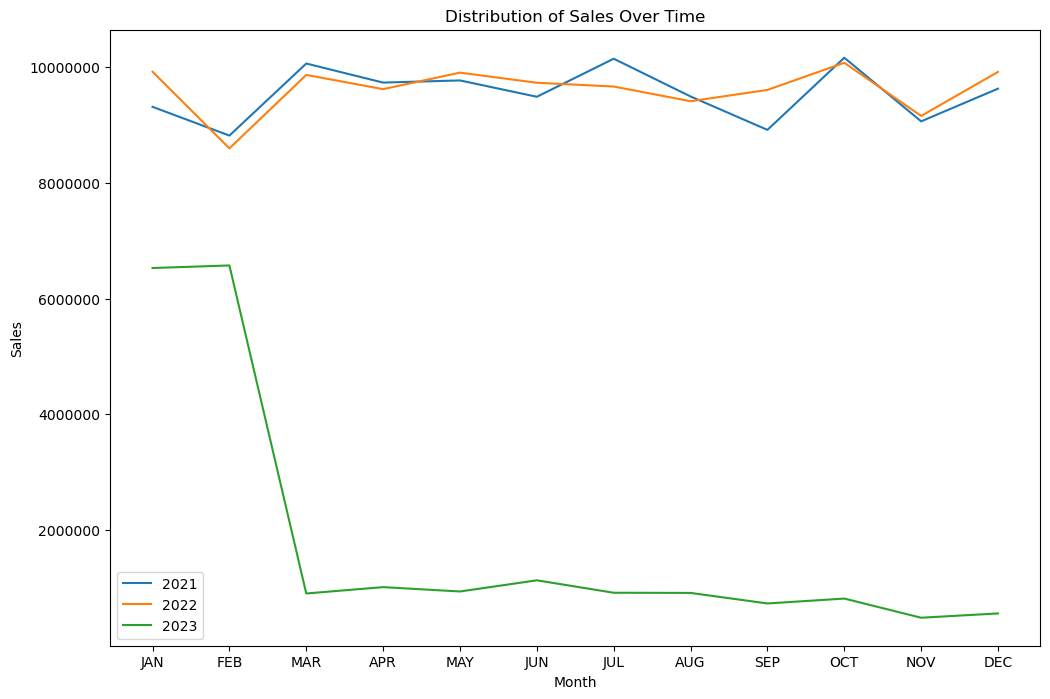

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

invoices_df["invoice_date"] = pd.to_datetime(invoices_df["invoice_date"])
invoices_df["year"] = invoices_df["invoice_date"].dt.year
invoices_df["month"] = invoices_df["invoice_date"].dt.month

sales_distribution = invoices_df.groupby(["year", "month"])["sales"].sum().reset_index()

plt.figure(figsize=(12, 8))
for year in sales_distribution["year"].unique():
    year_data = sales_distribution[sales_distribution["year"] == year]
    plt.plot(year_data["month"], year_data["sales"], label=str(year))

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Distribution of Sales Over Time")
plt.legend()

ax = plt.gca()
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"])

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

# Every January sales start off high and fall off into February. 
# This cannot be seen in 2023 though perhaps due to a lack of data.
# We can also say they have increased sales during December which means they have a December-January holiday season.
# Their sales drop off in February in both 2021 and 2022, it is not as drastic in 2023.
# They also have a summer sales increase in June and July.
# A steep drop in sales follow in August and September before another increase in October comes.
# Their sales are quite similar in 2021 and 2022 while 2023 sales are considerably lower.

In [9]:
merged_df['Decade Age Range'] = pd.cut(merged_df['age'], bins = range(0, 101, 10), labels = [f"{i} - {i + 9}" for i in range(0, 100, 10)])
pivot_table = merged_df.pivot_table(index = 'category', columns = 'Decade Age Range', values = 'sales', aggfunc = 'sum', dropna = True)

pivot_table = pivot_table.loc[:, (pivot_table != 0).any()]

print("Pivot Table - Breakdown of Sales by Category and Decade Age Range:")
pivot_table

Pivot Table - Breakdown of Sales by Category and Decade Age Range:


Decade Age Range,10 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89
category,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00
